## How to read a NWB File :
### - Using pynwb
### - Using the new NWBIO class of neo

# Packages

### All required packages

In [1]:
# python = 3.6.2
# pynwb = 1.0.1
# hdmf = 1.0.1
# neo = 0.8.0.dev

### NWB Packages

In [2]:
import pynwb
from pynwb import *

### neo Packages

In [3]:
import neo
from neo import *
print ("neo.__version__ = ", neo.__version__)

neo.__version__ =  0.8.0.dev


### Other packages

In [4]:
import urllib
import numpy as np
import quantities as pq
from matplotlib import pyplot
import matplotlib.pyplot as plt

# NWB File from Allen Institute

#### Download NWB file from :
#### http://download.alleninstitute.org/informatics-archive/prerelease/
#### File : H19.29.141.11.21.01.nwb

In [5]:
filename = "/home/elodie/NWB_Files/NWB_org/H19.29.141.11.21.01.nwb"
print("filename = ", filename)

filename =  /home/elodie/NWB_Files/NWB_org/H19.29.141.11.21.01.nwb


# Read NWB file with pynwb

In [6]:
io2 = pynwb.NWBHDF5IO(filename, mode='r')
print("io2 = ", io2)

io2 =  <pynwb.NWBHDF5IO object at 0x7fcc8ba31828>


In [7]:
io2.read_builder()

{'acquisition': {'index_00': {'capacitance_fast': {'attributes': {'unit': 'A'},
    'data': nan},
   'capacitance_slow': {'attributes': {'unit': 'Farad'}, 'data': nan},
   'data': {'attributes': {'conversion': 1e-12,
     'resolution': nan,
     'unit': 'A'},
    'data': <HDF5 dataset "data": shape (2500,), type "<f4">},
   'gain': {'attributes': {}, 'data': 1.0},
   'resistance_comp_bandwidth': {'attributes': {'unit': 'Hz'}, 'data': nan},
   'resistance_comp_correction': {'attributes': {'unit': 'pecent'},
    'data': nan},
   'resistance_comp_prediction': {'attributes': {'unit': 'pecent'},
    'data': nan},
   'starting_time': {'attributes': {'rate': 10000.0, 'unit': 'Seconds'},
    'data': 2.25},
   'whole_cell_capacitance_comp': {'attributes': {'unit': 'Farad'},
    'data': nan},
   'whole_cell_series_resistance_comp': {'attributes': {'unit': 'Ohm'},
    'data': nan},
   'comments': 'no comments',
   'description': '{\n    "cycle_id": 0,\n    "file": "H19_29_141_11_21_01_0000.abf",\

### Plotting settings

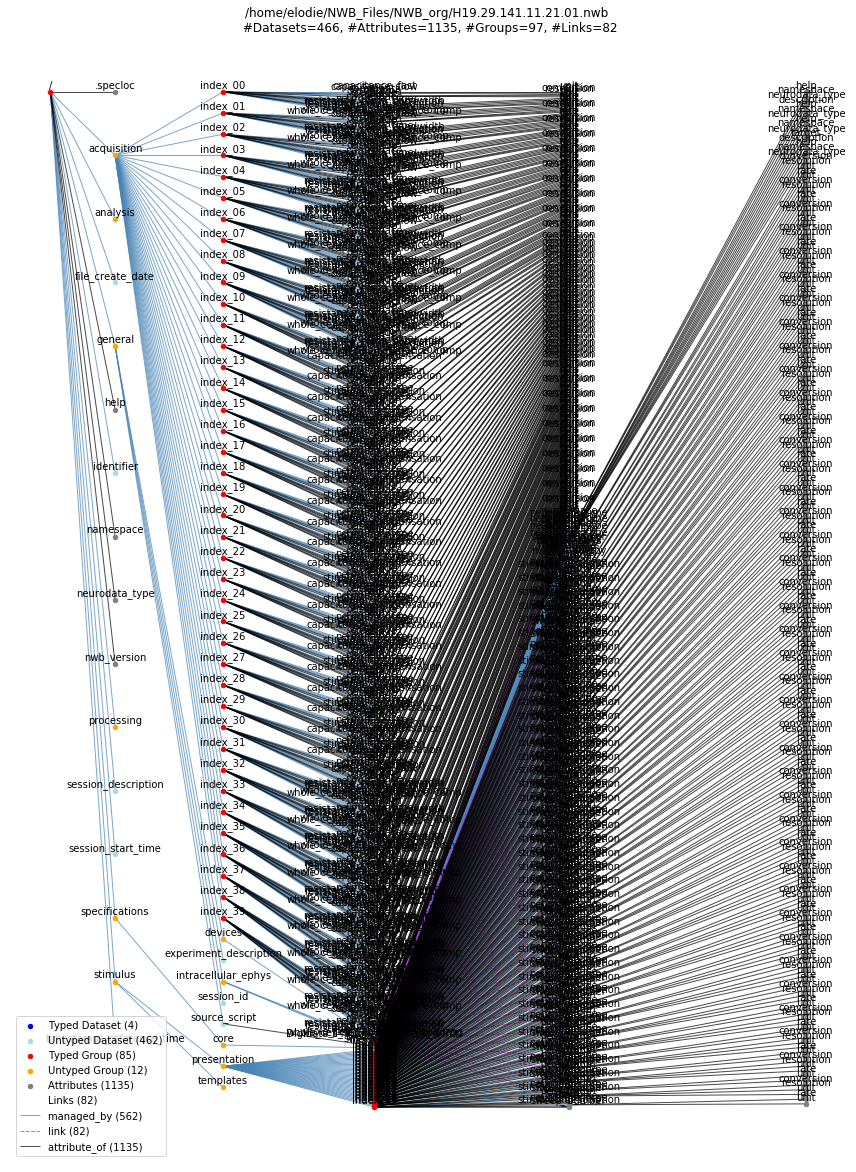

In [8]:
show_bar_plot = False
plot_single_file = True

from utils.render import HierarchyDescription, NXGraphHierarchyDescription
import matplotlib.pyplot as plt

file_hierarchy = HierarchyDescription.from_hdf5(filename)
file_graph = NXGraphHierarchyDescription(file_hierarchy)
fig = file_graph.draw(show_plot=False,
                      figsize=(12,16),
                      label_offset=(0.0, 0.0065),
                      label_font_size=10)

plot_title = filename + " \n " + "#Datasets=%i, #Attributes=%i, #Groups=%i, #Links=%i" % (len(file_hierarchy['datasets']), len(file_hierarchy['attributes']), len(file_hierarchy['groups']), len(file_hierarchy['links']))
plt.title(plot_title)
plt.show()

### Comparison with the website documentation

#### http://download.alleninstitute.org/informatics-archive/prerelease/H19.29.141.11.21.01.pdf

### Current vs time for the first index

file =  {
    "cycle_id": 0,
    "file": "H19_29_141_11_21_01_0000.abf",
    "name": "IN 0",
    "number": 0,
    "protocol": "EXTPINBATH_IN0",
    "protocolPath": "C:\\Allen Institute\\Allen Institute protocols with text attachment\\IN0\\EXTPINBATH_IN0.pro"
}
desc =  EXTPINBATH
rate =  10000.0
gain =  1.0
capacitance_fast =  nan
capacitance_slow =  nan
resistance_comp_bandwidth =  nan
resistance_comp_correction =  nan
resistance_comp_prediction =  nan
whole_cell_capacitance_comp =  nan
whole_cell_series_resistance_comp =  nan


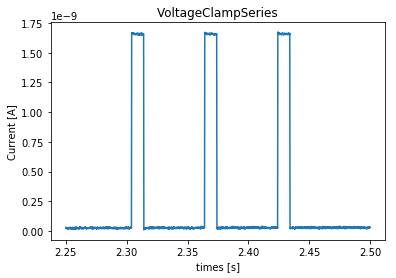

In [9]:
# VoltageClampSeries

container = io2.read()

for i in container.acquisition:

    if i=='index_00':
        print("file = ", container.get_acquisition(i).description)
        print("desc = ", container.get_acquisition(i).stimulus_description)
        print("rate = ", container.get_acquisition(i).rate) # Hz
        print("gain = ", container.get_acquisition(i).gain) # x
        print("capacitance_fast = ", container.get_acquisition(i).capacitance_fast) # F
        print("capacitance_slow = ", container.get_acquisition(i).capacitance_slow)
        print("resistance_comp_bandwidth = ", container.get_acquisition(i).resistance_comp_bandwidth)
        print("resistance_comp_correction = ", container.get_acquisition(i).resistance_comp_correction)
        print("resistance_comp_prediction = ", container.get_acquisition(i).resistance_comp_prediction)
        print("whole_cell_capacitance_comp = ", container.get_acquisition(i).whole_cell_capacitance_comp)
        print("whole_cell_series_resistance_comp = ", container.get_acquisition(i).whole_cell_series_resistance_comp)        
 
        current_shape = container.get_acquisition(i).data.shape[0]
        temps = np.zeros(current_shape)
        for j in range(0, current_shape):
            temps[j]=1./container.get_acquisition(i).rate*j+container.get_acquisition(i).starting_time

        plt.plot(temps, container.get_acquisition(i).data[:]*container.get_acquisition(i).conversion)
        plt.xlabel('times [s]')
        plt.ylabel('Current [%s]' %container.get_acquisition(i).unit) 
        plt.title('%s' %container.get_acquisition(i).neurodata_type)
        plt.show()

### Current vs time and Voltage vs time for all indexes

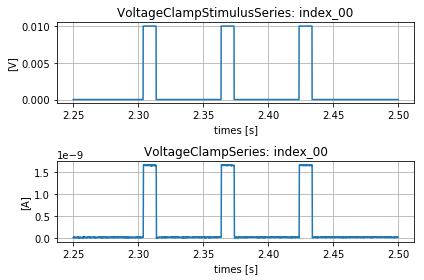

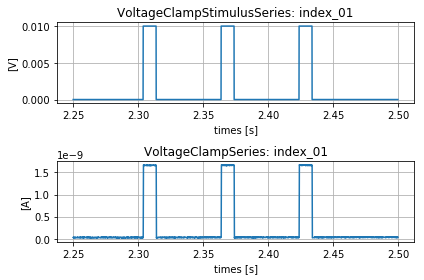

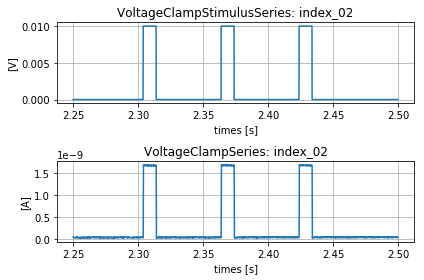

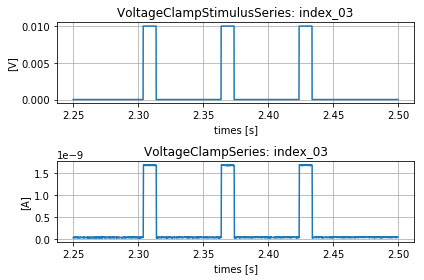

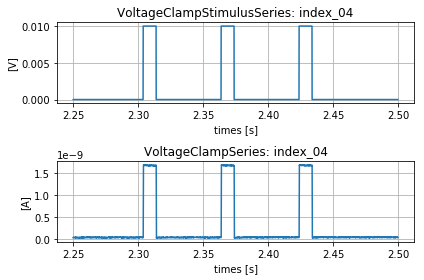

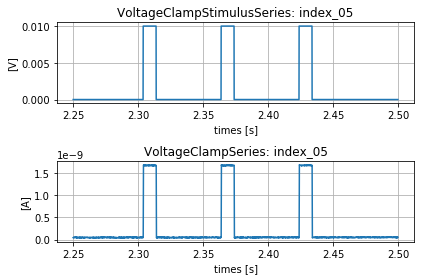

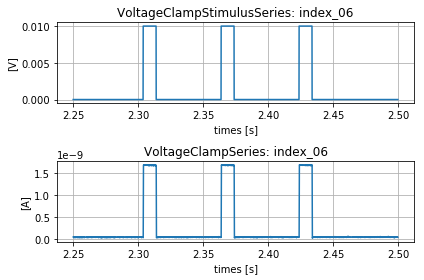

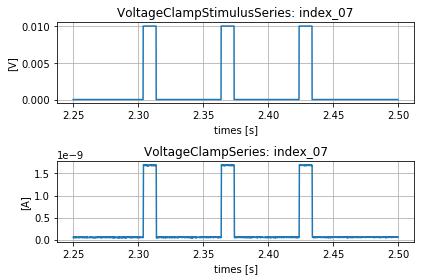

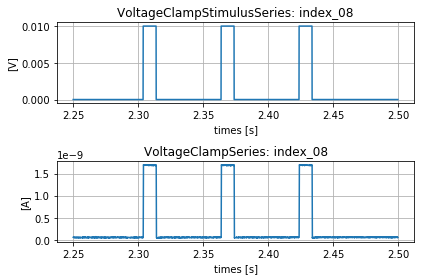

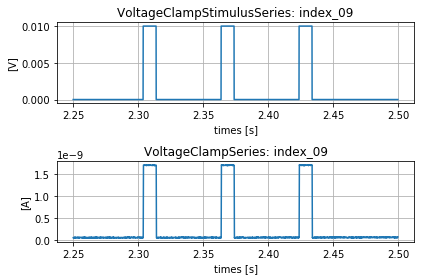

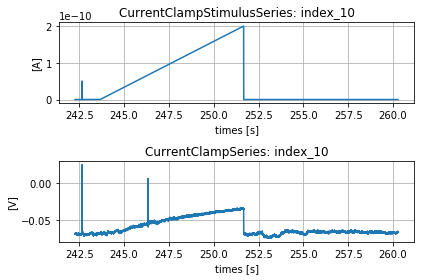

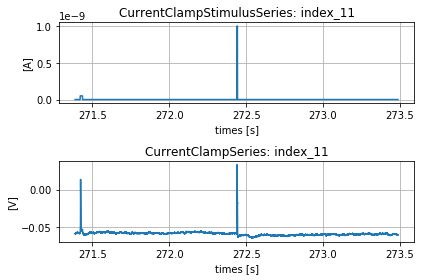

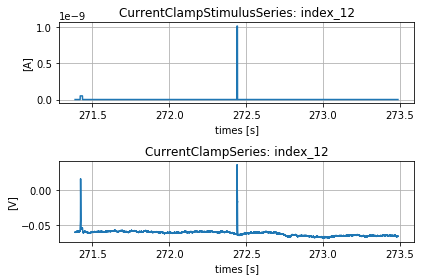

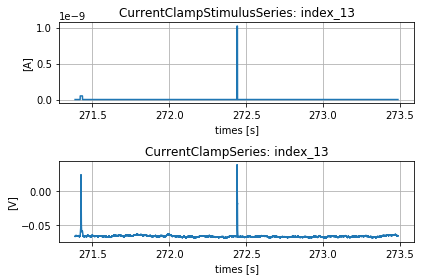

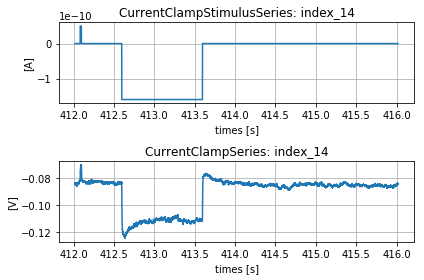

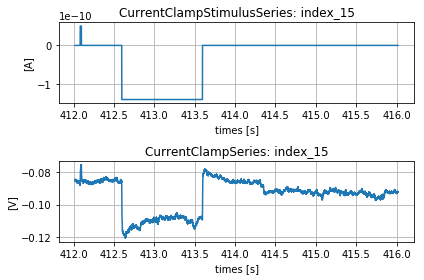

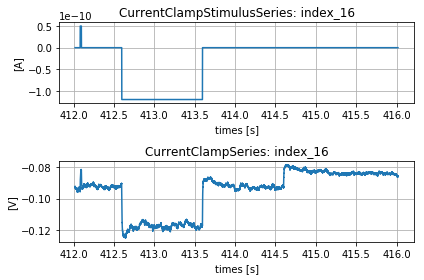

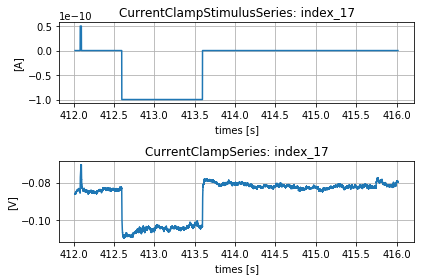

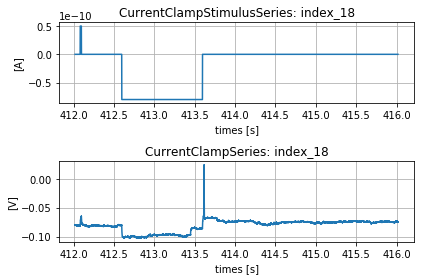

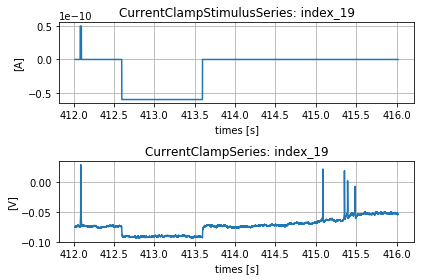

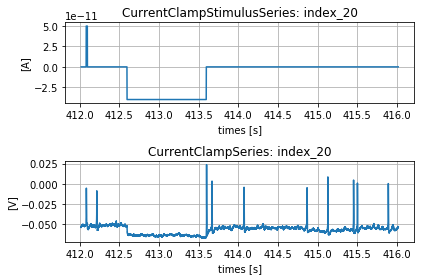

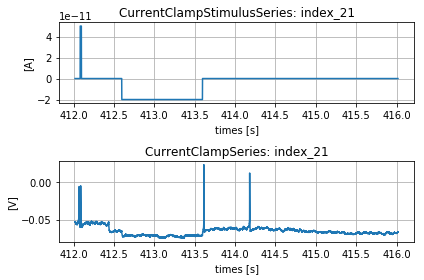

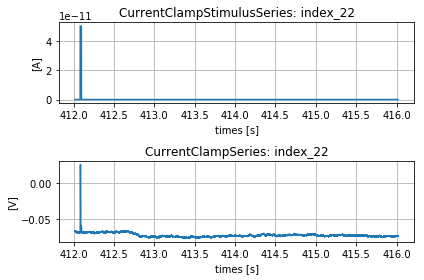

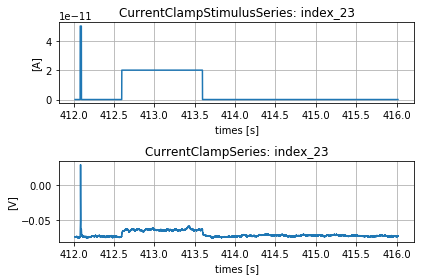

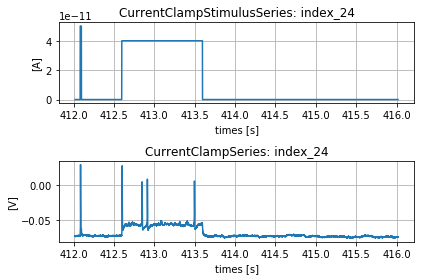

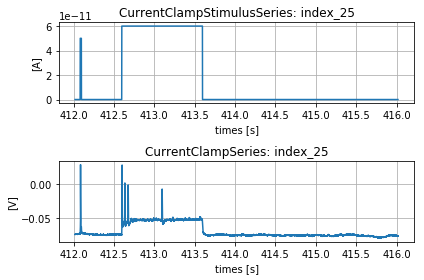

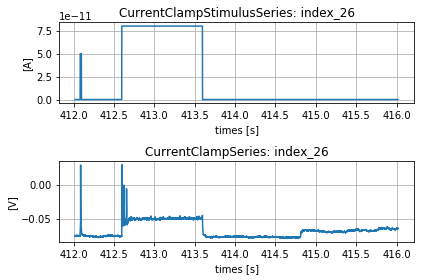

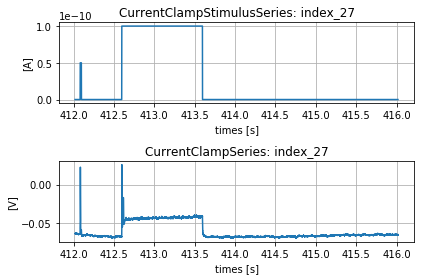

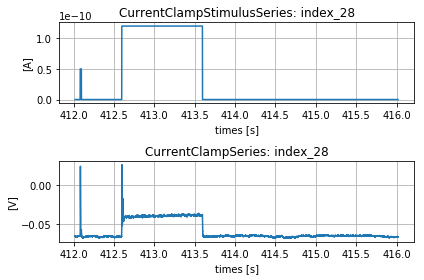

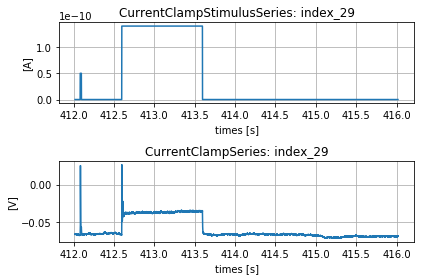

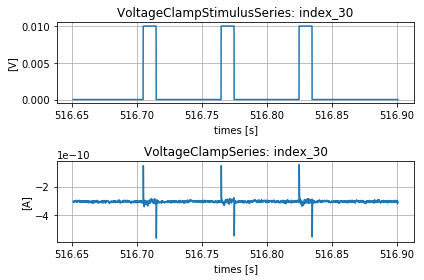

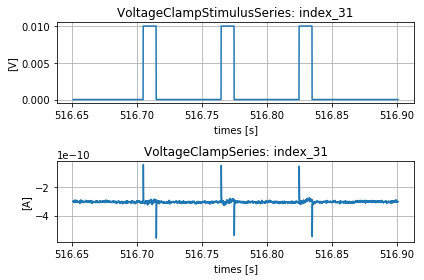

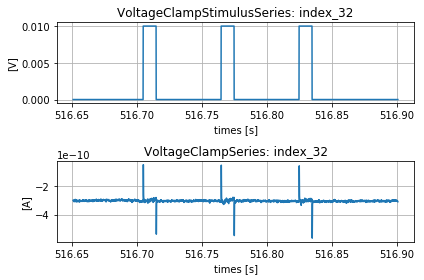

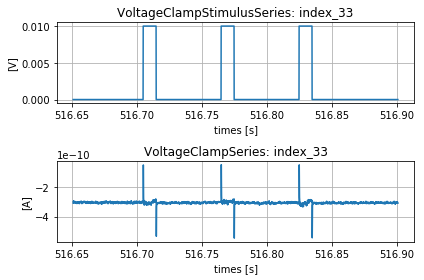

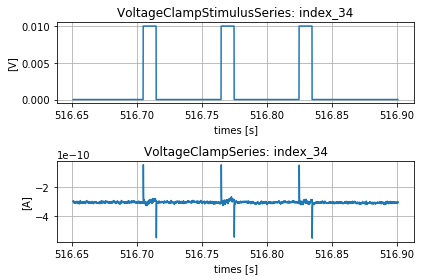

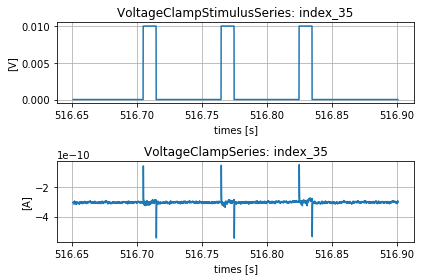

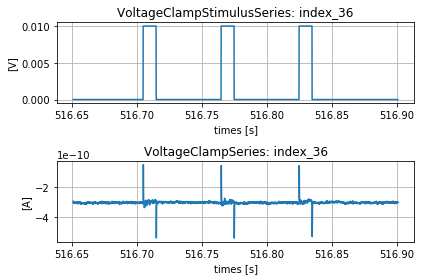

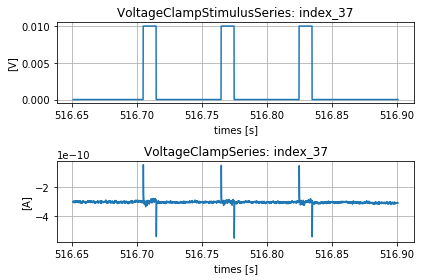

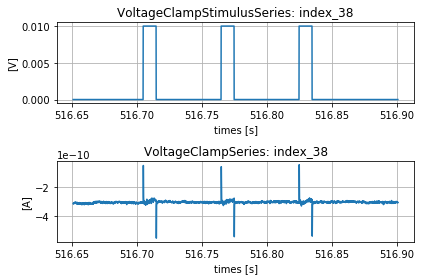

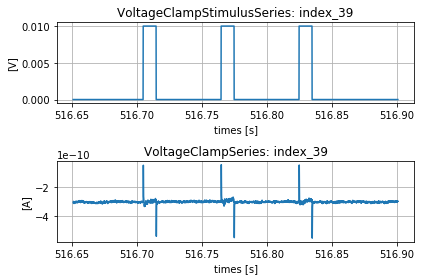

In [10]:
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('NWB_multigraphs.pdf')
container = io2.read()

for i in container.stimulus:

    fig = plt.figure()

    voltage_shape = container.get_stimulus(i).data.shape[0]
    temps_voltage = np.zeros(voltage_shape)
    for k in range(0, voltage_shape):
        temps_voltage[k]=1./container.get_stimulus(i).rate*k+container.get_acquisition(i).starting_time

    plt.subplot(2, 1, 1)    
    plt.plot(temps_voltage, container.get_stimulus(i).data[:]*container.get_stimulus(i).conversion)
    plt.xlabel('times [s]')
    plt.ylabel('[%s]' %container.get_stimulus(i).unit) 
    plt.title('%s: %s' %(container.get_stimulus(i).neurodata_type,i))
    plt.grid(True)
    
    current_shape = container.get_acquisition(i).data.shape[0]
    temps = np.zeros(current_shape)
    for j in range(0, current_shape):
        temps[j]=1./container.get_acquisition(i).rate*j+container.get_acquisition(i).starting_time
        
    plt.subplot(2, 1, 2)
    plt.plot(temps, container.get_acquisition(i).data[:]*container.get_acquisition(i).conversion)
    plt.xlabel('times [s]')
    plt.ylabel('[%s]' %container.get_acquisition(i).unit) 
    plt.title('%s: %s' %(container.get_acquisition(i).neurodata_type, i))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    pp.savefig(fig)
pp.close()

# neo

### Read NWB file from neo NWBIO class

In [11]:
reader = neo.io.NWBIO(filename)
print("reader = ", reader)

reader =  <neo.io.nwbio.NWBIO object at 0x7fcc881bbeb8>


### Read a neo block : 
#### Main container gathering all the data, whether discrete or continous, for a given recording session.

In [12]:
neo_block = reader.read_block(lazy=False)
print("neo_block = ", neo_block)

neo_block =  <neo.core.block.Block object at 0x7fcc8164a7b8>


### Read a neo segment : 
#### A container for data sharing a common time basis. 
#### A Segment is a heterogeneous container for discrete or continous data sharing a common clock (time basis) but not necessary the same sampling rate, start or end time.

In [13]:
segment = reader._handle_epochs_group(True, Block)
print("segment = ", segment)

segment =  (<neo.core.segment.Segment object at 0x7fcc89af8a58>, <AnalogSignal(array([[1.9897459e-11],
       [2.5268553e-11],
       [2.8076170e-11],
       ...,
       [2.9907226e-11],
       [2.8930662e-11],
       [3.0273437e-11]], dtype=float32) * A, [2.25 s, 2.5 s], sampling rate: 10000.0 Hz)>, array([2.25  , 2.2501, 2.2502, ..., 2.4997, 2.4998, 2.4999]))


### Read an analogsignal : 
#### Array of one or more continuous analog signals. A representation of several continuous, analog signals that have the same duration, sampling rate and start time.

In [14]:
ana = reader._handle_epochs_group(True, Block)[0].analogsignals
print("ana = ", ana)

ana =  [<AnalogSignal(array([[1.9897459e-11],
       [2.5268553e-11],
       [2.8076170e-11],
       ...,
       [2.9907226e-11],
       [2.8930662e-11],
       [3.0273437e-11]], dtype=float32) * A, [2.25 s, 2.5 s], sampling rate: 10000.0 Hz)>, <AnalogSignal(array([[1.9897459e-11],
       [2.5268553e-11],
       [2.8076170e-11],
       ...,
       [2.9907226e-11],
       [2.8930662e-11],
       [3.0273437e-11]], dtype=float32) * A, [2.25 s, 2.5 s], sampling rate: 10000.0 Hz)>, <AnalogSignal(array([[1.9897459e-11],
       [2.5268553e-11],
       [2.8076170e-11],
       ...,
       [2.9907226e-11],
       [2.8930662e-11],
       [3.0273437e-11]], dtype=float32) * A, [2.25 s, 2.5 s], sampling rate: 10000.0 Hz)>, <AnalogSignal(array([[1.9897459e-11],
       [2.5268553e-11],
       [2.8076170e-11],
       ...,
       [2.9907226e-11],
       [2.8930662e-11],
       [3.0273437e-11]], dtype=float32) * A, [2.25 s, 2.5 s], sampling rate: 10000.0 Hz)>, <AnalogSignal(array([[1.9897459e-11],
      

### Get parameters

In [15]:
data = reader._handle_epochs_group(False, '')[1] # segment.analogsignals
print("data = ", data)
times = reader._handle_epochs_group(True, Block)[2]
print("times = ", times)

data =  [[1.9897459e-11]
 [2.5268553e-11]
 [2.8076170e-11]
 ...
 [2.9907226e-11]
 [2.8930662e-11]
 [3.0273437e-11]] A
times =  [2.25   2.2501 2.2502 ... 2.4997 2.4998 2.4999]


### Plot a figure from neo

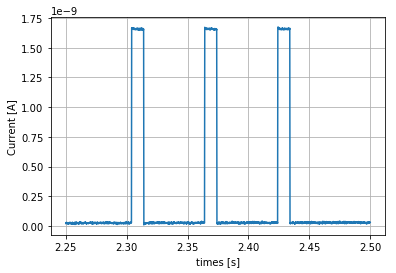

In [16]:
plt.plot(times, data)
plt.xlabel('times [s]')
plt.ylabel('Current [A]')
plt.grid(True)
plt.show()